# Program Synthesis using HDC

HDC is a method using vector operations to encode vectorized information in a superposition sum of random orthogonal complex vectors as keys multiuplied by any number of information vectors less than the total vector length. The formula for this encoding is provided below.

$ \hat{c}_{i} \in I^{N} $

$ \hat{c}_{i} \sim N_{I}(\mu = 0, \sigma = 1) $

$ \hat{k}_{i} = \frac{\hat{c}_{i}}{\hat{c}_{i} \odot \hat{\dot c}_{i}} $

$ \hat{v}_{i} \in I^{N} $

Where complex vector c_hat_i is drawn from the complex standard normal distribution, and k_hat_i denotes the unit norm equivalent of c_hat_i. The superposition of information vectors v_hat_i is enoded by the sum of the elementwise products of the informatio vectors v_hat_i with the complex key vectors k_hat_i. To decode an information vector given a known key, we simply take the element wise multiplication of superposition s_hat with the complex conjugate of the key vector k_hat_i.

$ \hat{s} = \sum_{i=1}^{N} \hat{k}_{i} \odot \hat{v}_{i} $

$ \hat{s} \odot \hat{\dot k}_{i} = \hat{v}_{i} + \hat{e} $

The key reason for why this approach works is that these sampled random complex vectors are alreadyt nearly ortthogonal for N sufficiently large, and can be made further othogonal using a method such as gram-schmidt. The element wise multiplication of orthogonal complex vectors, where one is conjugated is insignificant compared with the conjugate of a complex vector multiuled by itself, and thus we obtain the intended information vectyor in approximation.

## Using Complex Numbers and the Conjugate

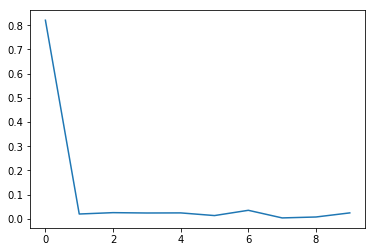

Maximum Similarity: 0


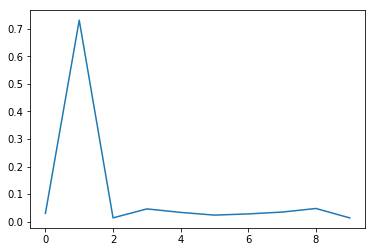

Maximum Similarity: 1


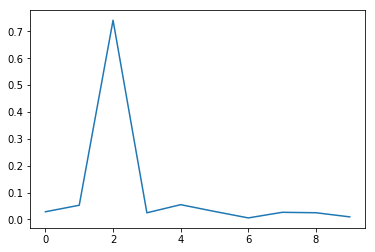

Maximum Similarity: 2


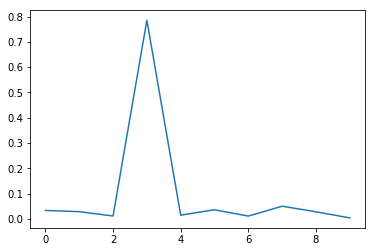

Maximum Similarity: 3


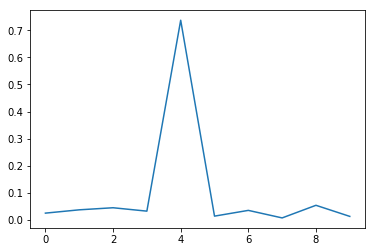

Maximum Similarity: 4


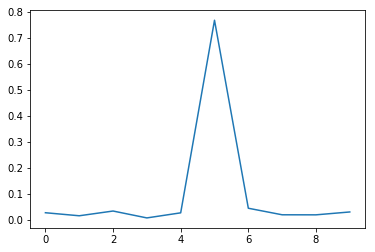

Maximum Similarity: 5


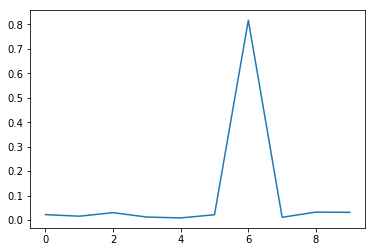

Maximum Similarity: 6


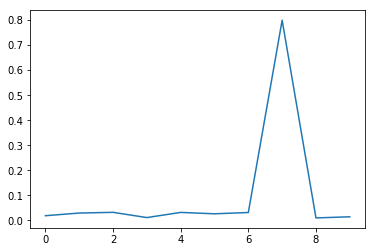

Maximum Similarity: 7


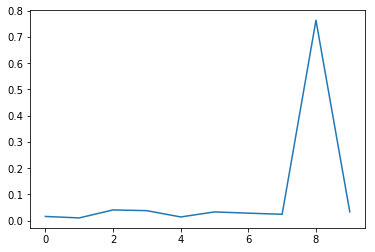

Maximum Similarity: 8


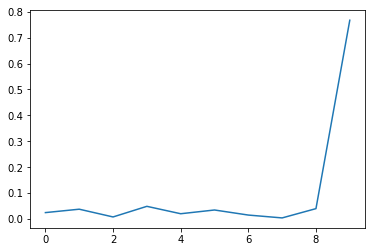

Maximum Similarity: 9


In [156]:
import numpy as np
import matplotlib.pyplot as plt


N = 10000
S = 10


keys = []
for _ in range(S):
    c = np.random.normal(0.0, 1.0, (N, 1)) + np.random.normal(0.0, 1.0, (N, 1))*1j
    k = c / np.absolute(c)
    keys += [k]

    
values = []
for _ in range(S):
    v = np.random.normal(0, 1, (N, 1))
    values += [v]

    
superposition = np.zeros((N, 1), dtype=np.complex128)
for k, v in zip(keys, values):
    superposition += k * v
    

for k in keys:
    recovered = superposition * np.conj(k)
    
    probabilities = np.zeros((0, 1))
    for v in values:
        similarity = np.absolute(recovered.T.dot(v))
        probabilities = np.vstack([probabilities, similarity])
    probabilities /= np.sum(probabilities)
    
    plt.plot(probabilities)
    plt.show()
    selected = np.argmax(probabilities)
    print("Maximum Similarity:", selected)


## An Equivalent Approach Using Matrices and Magnitude

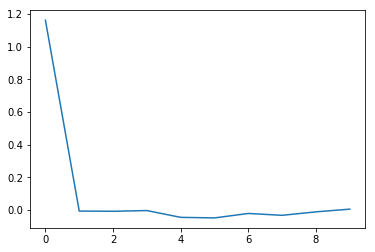

Maximum Similarity: 0


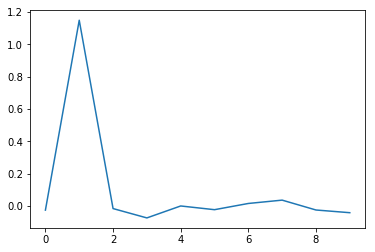

Maximum Similarity: 1


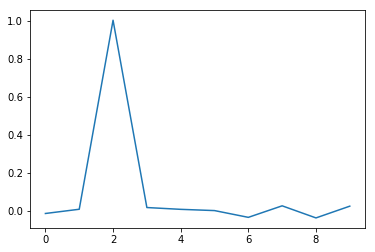

Maximum Similarity: 2


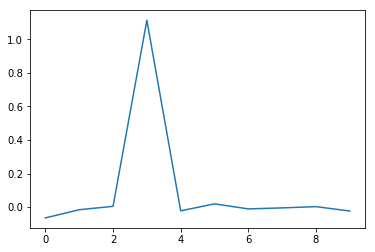

Maximum Similarity: 3


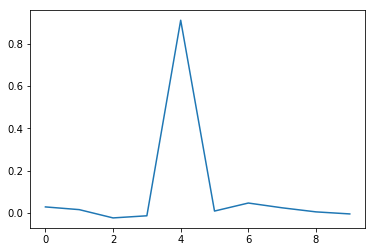

Maximum Similarity: 4


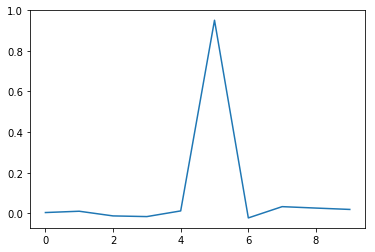

Maximum Similarity: 5


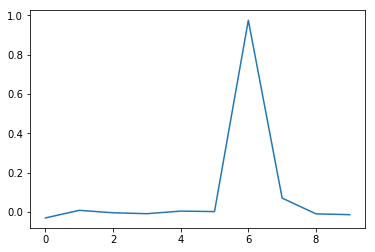

Maximum Similarity: 6


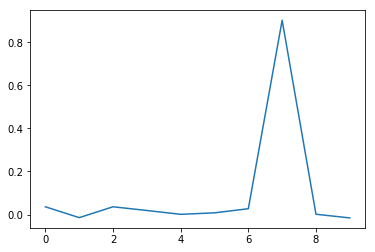

Maximum Similarity: 7


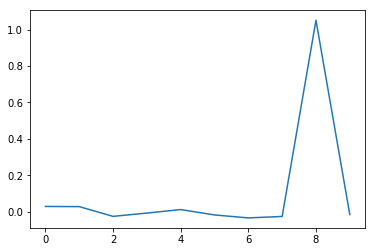

Maximum Similarity: 8


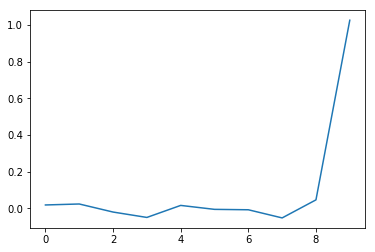

Maximum Similarity: 9


In [3]:
import numpy as np
import matplotlib.pyplot as plt


N = 10000
S = 10
M = 2


keys = []
for _ in range(S):
    rows = np.random.normal(0.0, 1.0, (N, M))
    row_magnitudes = np.sum(rows * rows, axis=1, keepdims=True)**(1/2)
    k = rows / row_magnitudes
    keys += [k]

    
values = []
for _ in range(S):
    v = np.random.normal(0, 1, (N, 1))
    values += [v]

    
superposition = np.zeros((N, M))
for k, v in zip(keys, values):
    superposition += k * v
    

for k in keys:
    recovered = np.sum(superposition * k, axis=1, keepdims=True)
    
    probabilities = np.zeros((0, 1))
    for v in values:
        similarity = recovered.T.dot(v)
        probabilities = np.vstack([probabilities, similarity])
    probabilities /= np.sum(probabilities)
    
    plt.plot(probabilities)
    plt.show()
    selected = np.argmax(probabilities)
    print("Maximum Similarity:", selected)
    